In [1]:
# This module collects Fitbit heart-rate data from an activity identified by its date, start and end times
# I use it to look at a swimming session that includes for intervals
# Each interval includes 250 meters of mostly free style swimming for about 6 minutes and upto 2 minutes rest
#
# The code is based on https://www.kdnuggets.com/2020/02/using-fitbit-web-api-python.html
# IT'S CODE: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Apis/Fitbit/Fitbit_API.ipynb

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitbit

import gather_keys_oauth2 as Oauth2
import pandas as pd 
import datetime

from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

# Also, gather_keys_oauth2.py should be in the working directory

In [3]:
# Initiate data collection from a Fitbit account

CLIENT_ID = 'XXXX' 
CLIENT_SECRET = 'xxxxxxx'

In [ ]:
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

In [5]:
# Collect Heart-Rate for an activity at a specific day starting and ending at specific times

oneDay = pd.datetime(year = 2021, month = 5, day = 13).date().strftime("%Y-%m-%d")

def subactivity(HourFrom, MinFrom,HourTo, MinTo,DF):
    activityStart= datetime.datetime(year=2021, month=5, day=13, hour=HourFrom, minute=MinFrom)
    activityEnd= datetime.datetime(year=2021, month=5, day=13, hour=HourTo, minute=MinTo)
    NewDF = DF [ (DF['date-time']>activityStart)  &  (DF['date-time']<activityEnd)    ]
    return NewDF

In [6]:
oneDayData = auth2_client.intraday_time_series(resource='activities/heart', base_date=oneDay, detail_level='1sec')
df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])

df['date']=oneDay
df['date-time']=pd.to_datetime(df['date'] + ' ' + df['time'])
df=subactivity(14,50,15,35,df)

In [7]:
# PLOT

In [8]:
myFormat = DateFormatter("%H:%M")
register_matplotlib_converters(myFormat)

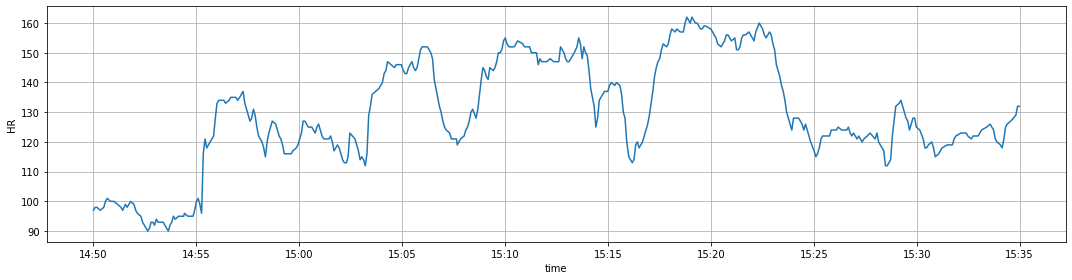

In [9]:
fig, axs = plt.subplots(figsize=(15, 4) )

axs.plot( df['date-time'], df['value']) 
axs.set_xlabel('time')
axs.set_ylabel('HR')
axs.grid(True)
axs.xaxis.set_major_formatter(myFormat)
    
fig.tight_layout()
plt.show()

In [10]:
bars=pd.DataFrame(  data=[ datetime.datetime(year=2021, month=5, day=13, hour=14, minute=55),   \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=3),    \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=8),    \
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=16),
                      datetime.datetime(year=2021, month=5, day=13, hour=15, minute=25)], \
                      columns=['date-time'] )

bars['interval']=160

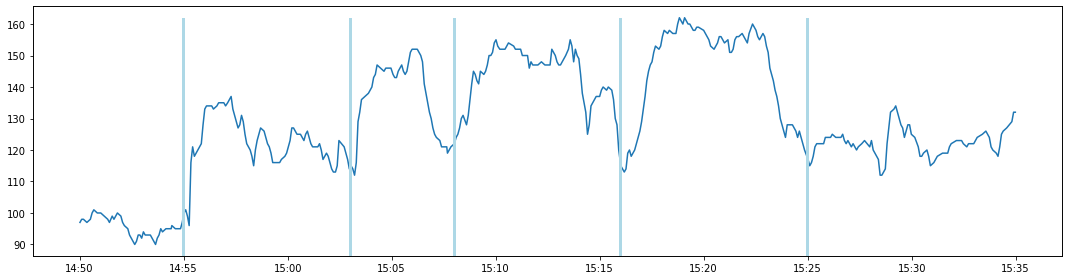

In [11]:
fig, ax = plt.subplots(figsize=(15, 4) )
barax = ax.twinx()

barax.bar( bars['date-time'], bars['interval'],width=0.0001, facecolor='lightblue') 
ax.xaxis.set_major_formatter(myFormat)
barax.set_yticks(ticks=[])

ax.plot( df['date-time'], df['value']) 
ax.xaxis.set_major_formatter(myFormat)
    
fig.tight_layout()
plt.show()

In [24]:
df0 = subactivity(14,55,15,2,df)
df1 = subactivity(15,2,15,9,df)
df2 = subactivity(15,8,15,17,df)
df3 = subactivity(15,16,15,26,df)

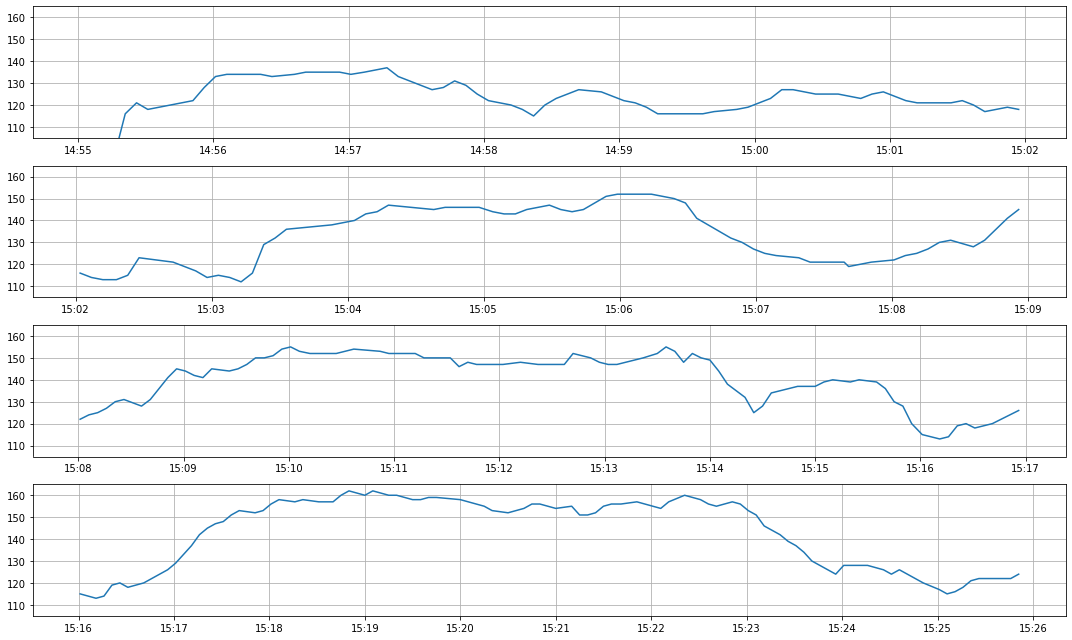

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(15, 3*3) )

axs[0].plot( df0['date-time'], df0['value']) 
axs[0].set_ylim([105,165])
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(myFormat)

axs[1].plot( df1['date-time'], df1['value']) 
axs[1].set_ylim([105,165])
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(myFormat)

axs[2].plot( df2['date-time'], df2['value'])
axs[2].set_ylim([105,165])
axs[2].grid(True)
axs[2].xaxis.set_major_formatter(myFormat)

axs[3].plot( df3['date-time'], df3['value']) 
axs[3].set_ylim([105,165])
axs[3].grid(True)
axs[3].xaxis.set_major_formatter(myFormat)
    
fig.tight_layout()
plt.show()

In [34]:
print('Mean HR per interval',round( df0['value'].mean() ),round( df1['value'].mean() ),round( df2['value'].mean() ),round( df3['value'].mean() ) )
print('Max  HR per interval',round( df0['value'].max() ),round( df1['value'].max() ),round( df2['value'].max() ),round( df3['value'].max() ) )

Mean HR per interval 123 133 140 142
Max  HR per interval 137 152 155 162
